# Training Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler,
        valid_data, num_epochs, stats_interval, 
        notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10507c3c8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10507c2b0>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

# Train Adam using CosineAnnealing scheduler

Epoch 1: 11.0s to complete
    error(train)=7.75e-01, acc(train)=7.54e-01, error(valid)=8.01e-01, acc(valid)=7.49e-01


Epoch 2: 7.7s to complete
    error(train)=6.69e-01, acc(train)=7.91e-01, error(valid)=7.24e-01, acc(valid)=7.81e-01


Epoch 3: 7.6s to complete
    error(train)=5.86e-01, acc(train)=8.13e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


Epoch 4: 7.8s to complete
    error(train)=6.13e-01, acc(train)=8.11e-01, error(valid)=6.99e-01, acc(valid)=7.97e-01


Epoch 5: 7.5s to complete
    error(train)=5.42e-01, acc(train)=8.25e-01, error(valid)=6.61e-01, acc(valid)=8.03e-01


Epoch 6: 7.4s to complete
    error(train)=5.82e-01, acc(train)=8.23e-01, error(valid)=7.10e-01, acc(valid)=7.99e-01


Epoch 7: 7.5s to complete
    error(train)=5.97e-01, acc(train)=8.22e-01, error(valid)=7.36e-01, acc(valid)=7.98e-01


Epoch 8: 7.4s to complete
    error(train)=5.62e-01, acc(train)=8.24e-01, error(valid)=7.26e-01, acc(valid)=7.97e-01


Epoch 9: 7.6s to complete
    error(train)=6.08e-01, acc(train)=8.16e-01, error(valid)=7.74e-01, acc(valid)=7.90e-01


Epoch 10: 7.7s to complete
    error(train)=5.50e-01, acc(train)=8.36e-01, error(valid)=7.44e-01, acc(valid)=8.02e-01


Epoch 11: 7.5s to complete
    error(train)=5.61e-01, acc(train)=8.29e-01, error(valid)=7.66e-01, acc(valid)=7.97e-01


Epoch 12: 7.5s to complete
    error(train)=5.30e-01, acc(train)=8.41e-01, error(valid)=7.62e-01, acc(valid)=8.07e-01


Epoch 13: 7.4s to complete
    error(train)=4.89e-01, acc(train)=8.52e-01, error(valid)=7.46e-01, acc(valid)=8.12e-01


Epoch 14: 7.5s to complete
    error(train)=5.04e-01, acc(train)=8.54e-01, error(valid)=7.81e-01, acc(valid)=8.12e-01


Epoch 15: 7.5s to complete
    error(train)=4.55e-01, acc(train)=8.62e-01, error(valid)=7.35e-01, acc(valid)=8.19e-01


Epoch 16: 7.6s to complete
    error(train)=4.57e-01, acc(train)=8.57e-01, error(valid)=7.47e-01, acc(valid)=8.07e-01


Epoch 17: 7.6s to complete
    error(train)=4.22e-01, acc(train)=8.76e-01, error(valid)=7.52e-01, acc(valid)=8.24e-01


Epoch 18: 7.4s to complete
    error(train)=3.92e-01, acc(train)=8.78e-01, error(valid)=7.08e-01, acc(valid)=8.21e-01


Epoch 19: 7.7s to complete
    error(train)=3.85e-01, acc(train)=8.82e-01, error(valid)=7.35e-01, acc(valid)=8.23e-01


Epoch 20: 7.6s to complete
    error(train)=3.62e-01, acc(train)=8.88e-01, error(valid)=7.21e-01, acc(valid)=8.23e-01


Epoch 21: 7.6s to complete
    error(train)=3.52e-01, acc(train)=8.91e-01, error(valid)=7.29e-01, acc(valid)=8.22e-01


Epoch 22: 7.6s to complete
    error(train)=3.42e-01, acc(train)=8.94e-01, error(valid)=7.17e-01, acc(valid)=8.23e-01


Epoch 23: 7.7s to complete
    error(train)=3.35e-01, acc(train)=8.96e-01, error(valid)=7.15e-01, acc(valid)=8.23e-01


Epoch 24: 7.5s to complete
    error(train)=3.31e-01, acc(train)=8.97e-01, error(valid)=7.11e-01, acc(valid)=8.24e-01


Epoch 25: 7.6s to complete
    error(train)=8.27e-01, acc(train)=8.01e-01, error(valid)=1.08e+00, acc(valid)=7.76e-01


Epoch 26: 7.5s to complete
    error(train)=8.10e-01, acc(train)=7.97e-01, error(valid)=1.08e+00, acc(valid)=7.69e-01


Epoch 27: 7.5s to complete
    error(train)=7.21e-01, acc(train)=8.15e-01, error(valid)=1.01e+00, acc(valid)=7.83e-01


Epoch 28: 7.7s to complete
    error(train)=7.28e-01, acc(train)=8.06e-01, error(valid)=1.00e+00, acc(valid)=7.70e-01


Epoch 29: 7.6s to complete
    error(train)=7.34e-01, acc(train)=8.18e-01, error(valid)=1.05e+00, acc(valid)=7.82e-01


Epoch 30: 7.6s to complete
    error(train)=7.76e-01, acc(train)=8.06e-01, error(valid)=1.10e+00, acc(valid)=7.72e-01


Epoch 31: 7.5s to complete
    error(train)=7.00e-01, acc(train)=8.15e-01, error(valid)=1.00e+00, acc(valid)=7.79e-01


Epoch 32: 7.7s to complete
    error(train)=6.57e-01, acc(train)=8.19e-01, error(valid)=9.35e-01, acc(valid)=7.83e-01


Epoch 33: 7.7s to complete
    error(train)=6.98e-01, acc(train)=8.21e-01, error(valid)=9.61e-01, acc(valid)=7.88e-01


Epoch 34: 7.6s to complete
    error(train)=6.93e-01, acc(train)=8.17e-01, error(valid)=9.82e-01, acc(valid)=7.82e-01


Epoch 35: 7.6s to complete
    error(train)=6.63e-01, acc(train)=8.23e-01, error(valid)=9.41e-01, acc(valid)=7.88e-01


Epoch 36: 7.4s to complete
    error(train)=7.27e-01, acc(train)=8.21e-01, error(valid)=1.05e+00, acc(valid)=7.86e-01


Epoch 37: 7.4s to complete
    error(train)=6.94e-01, acc(train)=8.26e-01, error(valid)=1.02e+00, acc(valid)=7.88e-01


Epoch 38: 7.6s to complete
    error(train)=6.80e-01, acc(train)=8.27e-01, error(valid)=9.95e-01, acc(valid)=7.86e-01


Epoch 39: 7.5s to complete
    error(train)=6.59e-01, acc(train)=8.32e-01, error(valid)=1.01e+00, acc(valid)=7.90e-01


Epoch 40: 7.5s to complete
    error(train)=6.52e-01, acc(train)=8.35e-01, error(valid)=1.01e+00, acc(valid)=7.91e-01


Epoch 41: 7.6s to complete
    error(train)=6.85e-01, acc(train)=8.26e-01, error(valid)=1.05e+00, acc(valid)=7.84e-01


Epoch 42: 7.5s to complete
    error(train)=6.17e-01, acc(train)=8.35e-01, error(valid)=9.81e-01, acc(valid)=7.91e-01


Epoch 43: 7.6s to complete
    error(train)=6.24e-01, acc(train)=8.35e-01, error(valid)=9.89e-01, acc(valid)=7.93e-01


Epoch 44: 7.5s to complete
    error(train)=6.15e-01, acc(train)=8.38e-01, error(valid)=9.86e-01, acc(valid)=7.95e-01


Epoch 45: 7.6s to complete
    error(train)=6.30e-01, acc(train)=8.44e-01, error(valid)=1.06e+00, acc(valid)=7.96e-01


Epoch 46: 7.6s to complete
    error(train)=6.07e-01, acc(train)=8.41e-01, error(valid)=1.02e+00, acc(valid)=7.92e-01


Epoch 47: 7.4s to complete
    error(train)=6.70e-01, acc(train)=8.30e-01, error(valid)=1.08e+00, acc(valid)=7.85e-01


Epoch 48: 7.5s to complete
    error(train)=5.95e-01, acc(train)=8.46e-01, error(valid)=1.04e+00, acc(valid)=7.96e-01


Epoch 49: 7.5s to complete
    error(train)=6.21e-01, acc(train)=8.37e-01, error(valid)=1.05e+00, acc(valid)=7.82e-01


Epoch 50: 7.5s to complete
    error(train)=5.87e-01, acc(train)=8.47e-01, error(valid)=1.02e+00, acc(valid)=8.01e-01


Epoch 51: 7.5s to complete
    error(train)=5.73e-01, acc(train)=8.39e-01, error(valid)=1.00e+00, acc(valid)=7.86e-01


Epoch 52: 7.6s to complete
    error(train)=6.04e-01, acc(train)=8.40e-01, error(valid)=1.06e+00, acc(valid)=7.87e-01


Epoch 53: 7.6s to complete
    error(train)=5.66e-01, acc(train)=8.47e-01, error(valid)=1.02e+00, acc(valid)=7.97e-01


Epoch 54: 7.5s to complete
    error(train)=5.72e-01, acc(train)=8.50e-01, error(valid)=1.03e+00, acc(valid)=8.00e-01


Epoch 55: 7.5s to complete
    error(train)=5.60e-01, acc(train)=8.48e-01, error(valid)=1.02e+00, acc(valid)=7.94e-01


Epoch 56: 7.6s to complete
    error(train)=5.75e-01, acc(train)=8.46e-01, error(valid)=1.03e+00, acc(valid)=7.93e-01


Epoch 57: 7.6s to complete
    error(train)=6.23e-01, acc(train)=8.46e-01, error(valid)=1.11e+00, acc(valid)=7.96e-01


Epoch 58: 7.7s to complete
    error(train)=5.48e-01, acc(train)=8.52e-01, error(valid)=1.05e+00, acc(valid)=7.96e-01


Epoch 59: 7.6s to complete
    error(train)=5.49e-01, acc(train)=8.51e-01, error(valid)=1.04e+00, acc(valid)=7.90e-01


Epoch 60: 7.6s to complete
    error(train)=5.29e-01, acc(train)=8.56e-01, error(valid)=1.01e+00, acc(valid)=7.97e-01


Epoch 61: 7.5s to complete
    error(train)=5.17e-01, acc(train)=8.63e-01, error(valid)=1.04e+00, acc(valid)=7.99e-01


Epoch 62: 7.6s to complete
    error(train)=5.29e-01, acc(train)=8.51e-01, error(valid)=1.07e+00, acc(valid)=7.89e-01


Epoch 63: 7.7s to complete
    error(train)=5.37e-01, acc(train)=8.61e-01, error(valid)=1.08e+00, acc(valid)=7.96e-01


Epoch 64: 7.2s to complete
    error(train)=5.84e-01, acc(train)=8.55e-01, error(valid)=1.14e+00, acc(valid)=7.93e-01


Epoch 65: 7.2s to complete
    error(train)=5.43e-01, acc(train)=8.54e-01, error(valid)=1.11e+00, acc(valid)=7.93e-01


Epoch 66: 7.4s to complete
    error(train)=5.11e-01, acc(train)=8.53e-01, error(valid)=1.05e+00, acc(valid)=7.85e-01


Epoch 67: 7.1s to complete
    error(train)=5.09e-01, acc(train)=8.64e-01, error(valid)=1.12e+00, acc(valid)=7.97e-01


Epoch 68: 459.7s to complete
    error(train)=5.02e-01, acc(train)=8.62e-01, error(valid)=1.10e+00, acc(valid)=7.91e-01


Epoch 69: 9.9s to complete
    error(train)=4.80e-01, acc(train)=8.65e-01, error(valid)=1.08e+00, acc(valid)=7.92e-01


Epoch 70: 9.6s to complete
    error(train)=4.59e-01, acc(train)=8.72e-01, error(valid)=1.07e+00, acc(valid)=7.99e-01


Epoch 71: 7.8s to complete
    error(train)=4.69e-01, acc(train)=8.74e-01, error(valid)=1.12e+00, acc(valid)=7.99e-01


Epoch 72: 7.6s to complete
    error(train)=4.43e-01, acc(train)=8.76e-01, error(valid)=1.07e+00, acc(valid)=8.00e-01


Epoch 73: 7.8s to complete
    error(train)=4.25e-01, acc(train)=8.79e-01, error(valid)=1.06e+00, acc(valid)=8.01e-01


Epoch 74: 7.8s to complete
    error(train)=4.27e-01, acc(train)=8.77e-01, error(valid)=1.07e+00, acc(valid)=7.96e-01


Epoch 75: 7.8s to complete
    error(train)=4.28e-01, acc(train)=8.81e-01, error(valid)=1.08e+00, acc(valid)=7.99e-01


Epoch 76: 7.7s to complete
    error(train)=4.19e-01, acc(train)=8.81e-01, error(valid)=1.09e+00, acc(valid)=7.98e-01


Epoch 77: 8.4s to complete
    error(train)=4.20e-01, acc(train)=8.84e-01, error(valid)=1.11e+00, acc(valid)=7.96e-01


Epoch 78: 9.2s to complete
    error(train)=4.20e-01, acc(train)=8.81e-01, error(valid)=1.11e+00, acc(valid)=7.97e-01


Epoch 79: 9.0s to complete
    error(train)=3.94e-01, acc(train)=8.87e-01, error(valid)=1.08e+00, acc(valid)=8.00e-01


Epoch 80: 9.5s to complete
    error(train)=3.74e-01, acc(train)=8.91e-01, error(valid)=1.07e+00, acc(valid)=8.00e-01


Epoch 81: 14.9s to complete
    error(train)=3.79e-01, acc(train)=8.91e-01, error(valid)=1.10e+00, acc(valid)=7.99e-01


Epoch 82: 12.2s to complete
    error(train)=3.75e-01, acc(train)=8.93e-01, error(valid)=1.11e+00, acc(valid)=8.01e-01


Epoch 83: 11.3s to complete
    error(train)=3.64e-01, acc(train)=8.95e-01, error(valid)=1.09e+00, acc(valid)=8.02e-01


Epoch 84: 11.1s to complete
    error(train)=3.49e-01, acc(train)=8.98e-01, error(valid)=1.08e+00, acc(valid)=8.03e-01


Epoch 85: 12.2s to complete
    error(train)=3.48e-01, acc(train)=8.98e-01, error(valid)=1.09e+00, acc(valid)=8.02e-01


Epoch 86: 14.0s to complete
    error(train)=3.44e-01, acc(train)=8.99e-01, error(valid)=1.09e+00, acc(valid)=8.01e-01


Epoch 87: 13.1s to complete
    error(train)=3.45e-01, acc(train)=9.02e-01, error(valid)=1.11e+00, acc(valid)=8.03e-01


Epoch 88: 9.8s to complete
    error(train)=3.42e-01, acc(train)=9.02e-01, error(valid)=1.10e+00, acc(valid)=8.01e-01


Epoch 89: 8.4s to complete
    error(train)=3.32e-01, acc(train)=9.04e-01, error(valid)=1.09e+00, acc(valid)=8.03e-01


Epoch 90: 9.3s to complete
    error(train)=3.37e-01, acc(train)=9.02e-01, error(valid)=1.10e+00, acc(valid)=8.00e-01


Epoch 91: 10.1s to complete
    error(train)=3.33e-01, acc(train)=9.05e-01, error(valid)=1.12e+00, acc(valid)=8.02e-01


Epoch 92: 10.8s to complete
    error(train)=3.25e-01, acc(train)=9.07e-01, error(valid)=1.11e+00, acc(valid)=8.03e-01


Epoch 93: 8.4s to complete
    error(train)=3.23e-01, acc(train)=9.08e-01, error(valid)=1.11e+00, acc(valid)=8.01e-01


Epoch 94: 10.2s to complete
    error(train)=3.21e-01, acc(train)=9.08e-01, error(valid)=1.11e+00, acc(valid)=8.02e-01


Epoch 95: 11.2s to complete
    error(train)=3.19e-01, acc(train)=9.08e-01, error(valid)=1.11e+00, acc(valid)=8.01e-01


Epoch 96: 11.6s to complete
    error(train)=3.18e-01, acc(train)=9.09e-01, error(valid)=1.11e+00, acc(valid)=8.02e-01


Epoch 97: 14.8s to complete
    error(train)=3.18e-01, acc(train)=9.09e-01, error(valid)=1.11e+00, acc(valid)=8.00e-01


Epoch 98: 12.8s to complete
    error(train)=3.16e-01, acc(train)=9.10e-01, error(valid)=1.11e+00, acc(valid)=8.01e-01


Epoch 99: 10.6s to complete
    error(train)=3.16e-01, acc(train)=9.10e-01, error(valid)=1.11e+00, acc(valid)=8.00e-01


Epoch 100: 10.9s to complete
    error(train)=7.31e-01, acc(train)=8.35e-01, error(valid)=1.34e+00, acc(valid)=7.80e-01



--------------------------------------------------------------------------------
learning_rate=0.00-0.00
--------------------------------------------------------------------------------


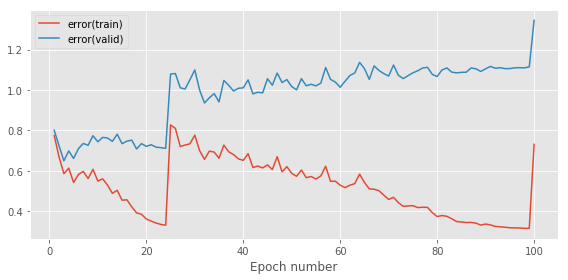

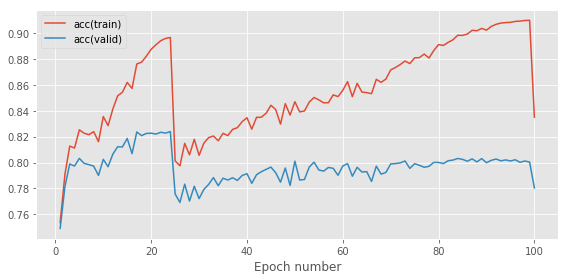

    final error(train) = 7.31e-01
    final error(valid) = 1.34e+00
    final acc(train)   = 8.35e-01
    final acc(valid)   = 7.80e-01
    run time per epoch = 15.75


Epoch 1: 8.9s to complete
    error(train)=1.29e+00, acc(train)=6.32e-01, error(valid)=1.29e+00, acc(valid)=6.28e-01


Epoch 2: 8.4s to complete
    error(train)=1.02e+00, acc(train)=7.01e-01, error(valid)=1.03e+00, acc(valid)=7.01e-01


Epoch 3: 9.7s to complete
    error(train)=8.86e-01, acc(train)=7.37e-01, error(valid)=9.00e-01, acc(valid)=7.31e-01


Epoch 4: 11.0s to complete
    error(train)=7.93e-01, acc(train)=7.62e-01, error(valid)=8.11e-01, acc(valid)=7.54e-01


Epoch 5: 9.2s to complete
    error(train)=7.31e-01, acc(train)=7.78e-01, error(valid)=7.50e-01, acc(valid)=7.75e-01


Epoch 6: 7.4s to complete
    error(train)=6.86e-01, acc(train)=7.88e-01, error(valid)=7.09e-01, acc(valid)=7.79e-01


Epoch 7: 8.3s to complete
    error(train)=6.46e-01, acc(train)=8.01e-01, error(valid)=6.77e-01, acc(valid)=7.92e-01


Epoch 8: 9.3s to complete
    error(train)=6.26e-01, acc(train)=8.06e-01, error(valid)=6.58e-01, acc(valid)=7.95e-01


Epoch 9: 12.8s to complete
    error(train)=6.07e-01, acc(train)=8.09e-01, error(valid)=6.44e-01, acc(valid)=7.96e-01


Epoch 10: 7.3s to complete
    error(train)=5.86e-01, acc(train)=8.16e-01, error(valid)=6.28e-01, acc(valid)=8.04e-01


Epoch 11: 6.8s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=6.17e-01, acc(valid)=8.04e-01


Epoch 12: 6.7s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=6.13e-01, acc(valid)=8.05e-01


Epoch 13: 7.5s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


Epoch 14: 6.5s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.89e-01, acc(valid)=8.13e-01


Epoch 15: 7.2s to complete
    error(train)=5.32e-01, acc(train)=8.32e-01, error(valid)=5.86e-01, acc(valid)=8.15e-01


Epoch 16: 6.6s to complete
    error(train)=5.27e-01, acc(train)=8.34e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


Epoch 17: 7.3s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.79e-01, acc(valid)=8.18e-01


Epoch 18: 8.0s to complete
    error(train)=5.19e-01, acc(train)=8.36e-01, error(valid)=5.77e-01, acc(valid)=8.16e-01


Epoch 19: 8.1s to complete
    error(train)=5.14e-01, acc(train)=8.38e-01, error(valid)=5.73e-01, acc(valid)=8.17e-01


Epoch 20: 6.6s to complete
    error(train)=5.13e-01, acc(train)=8.37e-01, error(valid)=5.72e-01, acc(valid)=8.18e-01


Epoch 21: 6.5s to complete
    error(train)=5.12e-01, acc(train)=8.38e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 22: 6.5s to complete
    error(train)=5.10e-01, acc(train)=8.39e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


Epoch 23: 13.2s to complete
    error(train)=5.09e-01, acc(train)=8.40e-01, error(valid)=5.69e-01, acc(valid)=8.19e-01


Epoch 24: 15.7s to complete
    error(train)=5.08e-01, acc(train)=8.40e-01, error(valid)=5.69e-01, acc(valid)=8.20e-01


Epoch 25: 7.4s to complete
    error(train)=5.29e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.11e-01


Epoch 26: 8.7s to complete
    error(train)=5.27e-01, acc(train)=8.31e-01, error(valid)=5.90e-01, acc(valid)=8.14e-01


Epoch 27: 6.9s to complete
    error(train)=5.13e-01, acc(train)=8.34e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


Epoch 28: 6.6s to complete
    error(train)=5.02e-01, acc(train)=8.39e-01, error(valid)=5.75e-01, acc(valid)=8.19e-01


Epoch 29: 7.5s to complete
    error(train)=4.92e-01, acc(train)=8.41e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 30: 6.5s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


Epoch 31: 6.3s to complete
    error(train)=4.80e-01, acc(train)=8.44e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 32: 4.2s to complete
    error(train)=4.74e-01, acc(train)=8.46e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


Epoch 33: 4.1s to complete
    error(train)=4.71e-01, acc(train)=8.48e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


Epoch 34: 4.5s to complete
    error(train)=4.63e-01, acc(train)=8.50e-01, error(valid)=5.59e-01, acc(valid)=8.24e-01


Epoch 35: 4.2s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=5.67e-01, acc(valid)=8.22e-01


Epoch 36: 5.0s to complete
    error(train)=4.59e-01, acc(train)=8.49e-01, error(valid)=5.63e-01, acc(valid)=8.20e-01


Epoch 37: 5.3s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


Epoch 38: 4.4s to complete
    error(train)=4.39e-01, acc(train)=8.55e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 39: 7.8s to complete
    error(train)=4.37e-01, acc(train)=8.58e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


Epoch 40: 6.4s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

min_learning_rates = [1e-5, 1e-6]
max_learning_rates = [1e-3, 1e-4]

for i in range(2):
    
    #setup hyperparameters
    min_learning_rate = min_learning_rates[i]
    max_learning_rate = max_learning_rates[i]
    total_iters_per_period = 25
    max_learning_rate_discount_factor = 0.8
    period_iteration_expansion_factor = 3
    num_epochs = 100

    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 100

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()

    scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate, max_learning_rate, total_iters_per_period, max_learning_rate_discount_factor,
                     period_iteration_expansion_factor)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "adam_fig_1_" + str(min_learning_rate) + "-" + str(max_learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "adam_fig_2_" + str(min_learning_rate) + "-" + str(max_learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('learning_rate={0:.2f}-{1:.2f}'
          .format(min_learning_rate, max_learning_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))